In [8]:
import pandas as pd

# Create a small dataset
data = {
    'Area': [1200, 1500, 1700, np.nan, 1600, 1400, 1800, 1100, 1250, 1550],
    'Bedrooms': [2, 3, 3, 2, 3, 2, 4, 2, 2, 3],
    'Color': ['Blue', 'Green', 'Yellow', 'Blue', 'Yellow', 'Green', 'Yellow', 'Yellow', 'Blue', 'Pink'],
    'Age': [10, 15, 20, 12, 18, 14, 5, 30, 8, 16],
    'Price': [200000, 250000, 270000, 220000, 260000, 240000, 290000, 180000, 210000, 255000]
}

df = pd.DataFrame(data)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


HANDELING MISSING VALUES AND FILLING IT WITH THE MEAN

In [10]:
df['Area'] = df['Area'].fillna(df['Area'].mean())

WHICH ARE CATEGORICAL IN MY DATASET?

In [11]:
df.select_dtypes(include=['object', 'category']).columns


Index(['Color'], dtype='object')

HANDELING THE CATEGORICAL VALUES

In [12]:
df = pd.get_dummies(df, drop_first=True)

In [13]:
X = df.drop('Price', axis=1)
y = df['Price']

The above graph is of multidimentional vectors so it can't be visualised using seaborn heatmap.

SPECIFYING HOW MUCH TO USE FOR TRAINING THE MODEL AND HOW MUCH FOR TESTING THE OUTPUTS ON HOW WELL IT IS TRAINED

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 10018.73958911671
RMSE: 11519.321955357813
R² Score: 0.6682630542220286


What they mean ⬆️ :

MAE (Mean Absolute Error): average absolute errors. Lower is better.

RMSE: penalizes large errors more. Again, lower = better.

R²: explains how well your model fits the data. 1 = perfect fit, 0 = no fit.
one doubt that arised in my mind is how can a model not fit the data when it is made from the data itself and the answers i found are - the model trains itself based on some data here it is specified 80% of the total data, now if the model catches the pattern well on how the input output works then it is well trained and performs better with the test data which here is the leftover 20%. But here in the randomn dataset that i have created without any logiv just to work on it , dosen't really have any logic so the model is memorising it instead of logically catching the pattern so the R² is closer to 0 here. 

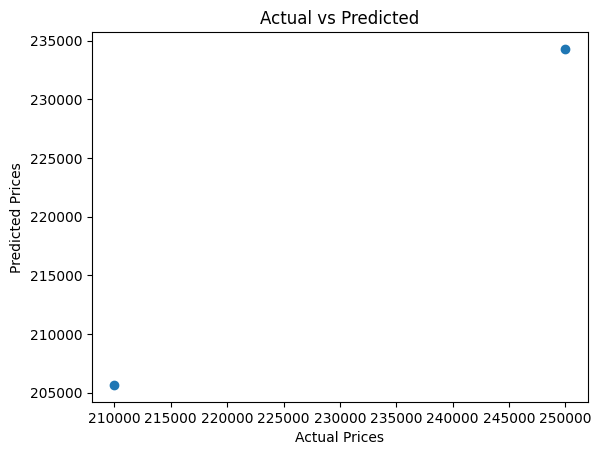

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()